In [1]:
import pandas as pd
import numpy as np

In [2]:
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')
submission_raw = pd.read_csv('data/sampleSubmission.csv')

In [3]:
# 데이터 셋 확인하기(shape)
print('모델 학습용 데이터의 shape:', train_raw.shape)
print('테스트용 데이터의 shape:', test_raw.shape)

모델 학습용 데이터의 shape: (10886, 12)
테스트용 데이터의 shape: (6493, 9)


In [4]:
# 학습용 데이터 타입 확인(info)
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# datetime -> 데이터 타입 변경
train_raw['datetime'] = train_raw.datetime.apply(pd.to_datetime)
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
# 결측치 확인
train_raw.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# 선형회귀는 정수/실수형 데이터를 다루기 때문에
# datetime 형태의 데이터를 사용할 수 없음 -> 새로운 feature 필요

# datetime -> 년, 월, 일, 시, 분, 초, 요일로 추가
train_raw['year'] = train_raw['datetime'].apply(lambda x : x.year)
train_raw['month'] = train_raw['datetime'].apply(lambda x : x.month)
train_raw['day'] = train_raw['datetime'].apply(lambda x : x.day)
train_raw['hour'] = train_raw['datetime'].apply(lambda x : x.hour)
train_raw['minute'] = train_raw['datetime'].apply(lambda x : x.minute)
train_raw['second'] = train_raw['datetime'].apply(lambda x : x.second)
train_raw['dayofweek'] = train_raw['datetime'].apply(lambda x : x.dayofweek)

In [8]:
train_raw.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


In [9]:
# 모든 값이 0인 분과 초 컬럼, 19일까지의 데이터만 존재하는 day 삭제
drop_col = ['minute', 'second', 'day']
train_raw.drop(drop_col, axis=1, inplace=True)

In [10]:
train_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


### 데이터 시각화

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '연도별 대여량')

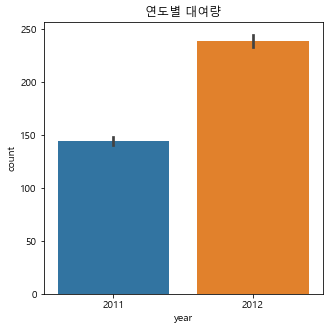

In [13]:
# 연도별 대여수
fig = plt.figure(figsize = (5,5))
ax1 = sns.barplot(x='year', y='count', data = train_raw)
ax1.set_title('연도별 대여량')

# 결과: 2011년 대비 2012년의 대여량이 많음

Text(0.5, 1.0, '근무일 여부에 따른 대여량')

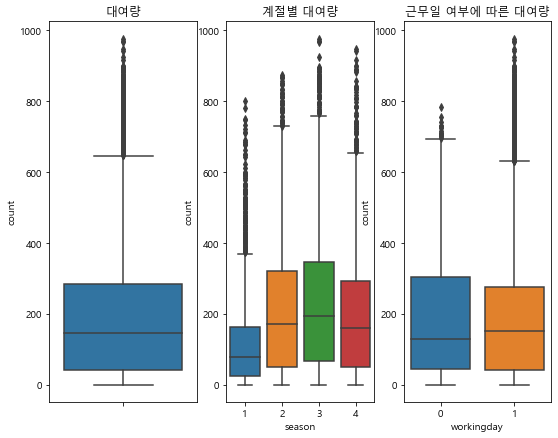

In [14]:
# 전체 대여수 및 계절별 대여수, 근무일 여부에 따른 대여수
fig = plt.figure(figsize=(9,7))
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(y='count', data=train_raw, ax=ax1)
ax1.set_title('대여량')

sns.boxplot(x='season', y='count', data=train_raw, ax=ax2)
ax2.set_title('계절별 대여량')

sns.boxplot(x='workingday', y='count', data=train_raw, ax=ax3)
ax3.set_title('근무일 여부에 따른 대여량')

# 결과: 봄의 대여량이 가장 적고, 근무일 여부에 따른 대여량 큰 차이 없음
# 이상치가 많음 (count)

Text(0.5, 1.0, '시간대별 대여량')

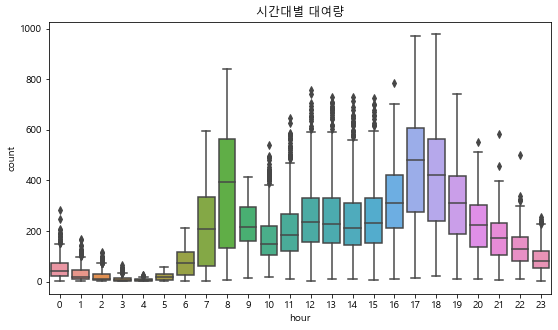

In [15]:
# 시간대별 대여수
fig = plt.figure(figsize=(9,5))

ax1= sns.boxplot(x='hour', y='count', data=train_raw)
ax1.set_title('시간대별 대여량')

# 결과: 출퇴근 시간대(8시, 17시)에 대여량이 높음

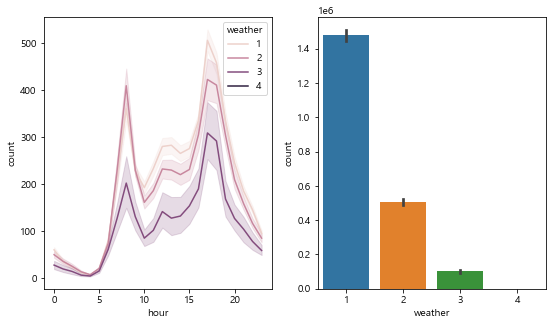

In [16]:
# 날씨별 대여수
fig = plt.figure(figsize=(9,5))
(ax1, ax2) = fig.subplots(1,2)

ax1 = sns.lineplot(x='hour', y='count', hue='weather',data=train_raw, ax=ax1)
ax2 = sns.barplot(x='weather', y='count', data=train_raw, estimator=np.sum, ax=ax2)

# 결과: 매우 나쁜 날씨일 때는 자전거 거의 타지 않음

### 데이터 간 상관 관계 분석

<AxesSubplot:>

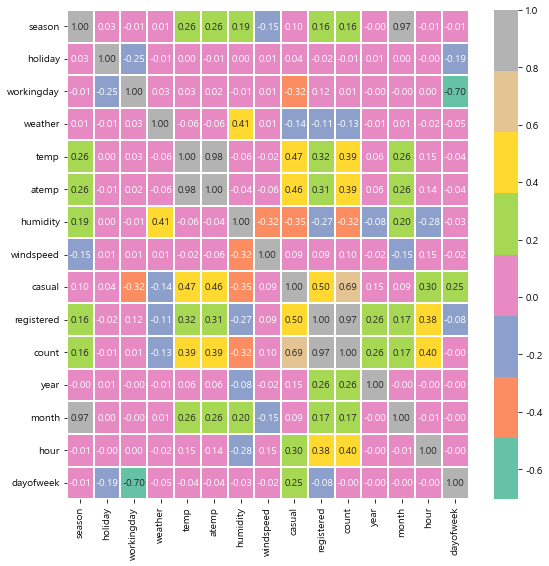

In [17]:
fig = plt.figure(figsize=(9,9))
sns.heatmap(train_raw.corr(), annot=True, fmt='.2f', 
            linewidths=0.02, cmap='Set2')

# 결과: registered - 상관관계는 높지만 예측 target이므로 feature에서 제외
# 온도와 체감온도간 상관관계가 높기 때문에 둘 중 하나만 사용

### feature 간 다중 공선성 확인

<AxesSubplot:>

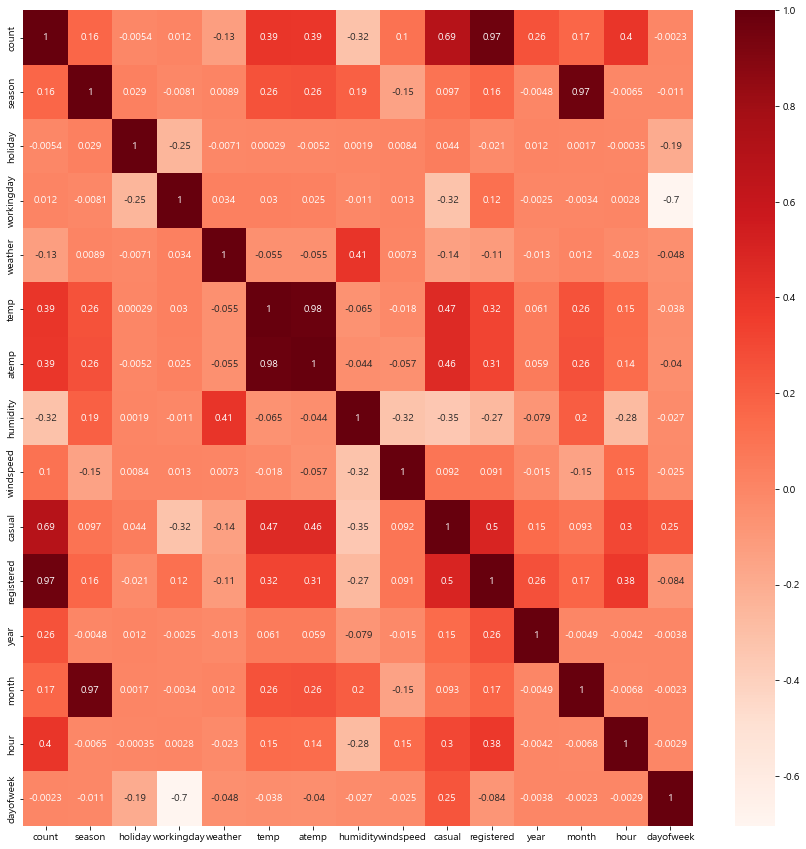

In [18]:
train_corr = train_raw[['count', 'season', 'holiday', 'workingday', 'weather',
                      'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
                      'year', 'month', 'hour','dayofweek']]
plt.rcParams['figure.figsize']=(15,15)

sns.heatmap(train_corr.corr(),
           annot=True, cmap='Reds')

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

C:\Users\ellie\anaconda3\envs\sesac\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,count
1,109.522392,season
2,1.568722,holiday
3,10.100298,workingday
4,7.526223,weather
5,277.407606,temp
6,316.052166,atemp
7,19.469870,humidity
8,4.163531,windspeed
9,inf,casual


In [20]:
# vif 계수가 높은 casual, registered 삭제 -> vif 계수 다시 확인
train_corr=train_corr.drop(['casual','registered'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

,VIF Factor,features
0,3.198964,count
1,109.501729,season
2,1.565107,holiday
3,9.064515,workingday
4,7.509650,weather
5,276.822462,temp
6,315.782992,atemp
7,18.497659,humidity
8,4.162663,windspeed
9,67.150095,year


In [21]:
# temp와 atemp의 vif 계수 높음 -> 유사성을 띄므로 더 높은 atemp만 삭제
train_corr=train_corr.drop(['atemp'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

,VIF Factor,features
0,3.193035,count
1,109.501710,season
2,1.555634,holiday
3,8.995165,workingday
4,7.502615,weather
5,9.640192,temp
6,18.427803,humidity
7,3.993074,windspeed
8,63.203857,year
9,83.786313,month


In [22]:
# season의 vif 계수 높음 -> 삭제
train_corr=train_corr.drop(['season'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

,VIF Factor,features
0,3.192226,count
1,1.542589,holiday
2,8.995000,workingday
3,7.502246,weather
4,9.627024,temp
5,18.399126,humidity
6,3.991885,windspeed
7,59.776252,year
8,5.384889,month
9,4.720973,hour


In [23]:
# year의 vif 계수 높음 -> 삭제
train_corr=train_corr.drop(['year'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

,VIF Factor,features
0,3.185164,count
1,1.294296,holiday
2,5.468718,workingday
3,7.470096,weather
4,8.865156,temp
5,13.667772,humidity
6,3.467739,windspeed
7,5.350204,month
8,4.440493,hour
9,5.331332,dayofweek


In [24]:
# humidity의 vif 계수 높음 -> 삭제
train_corr=train_corr.drop(['humidity'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_corr.values, i) \
                     for i in range(train_corr.shape[1])]
vif['features'] = train_corr.columns
vif

,VIF Factor,features
0,3.001417,count
1,1.231232,holiday
2,4.646392,workingday
3,5.346920,weather
4,8.563705,temp
5,3.401571,windspeed
6,4.816740,month
7,4.430032,hour
8,4.428983,dayofweek


In [25]:
train_corr_re = train_raw[['datetime', 'count', 'holiday', 'workingday', 'weather','temp', 'windspeed', 'month', 'hour','dayofweek']]

In [26]:
train_corr_re

,datetime,count,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek
0,2011-01-01 00:00:00,16,0,0,1,9.84,0.0000,1,0,5
1,2011-01-01 01:00:00,40,0,0,1,9.02,0.0000,1,1,5
2,2011-01-01 02:00:00,32,0,0,1,9.02,0.0000,1,2,5
3,2011-01-01 03:00:00,13,0,0,1,9.84,0.0000,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,0.0000,1,4,5
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,336,0,1,1,15.58,26.0027,12,19,2
10882,2012-12-19 20:00:00,241,0,1,1,14.76,15.0013,12,20,2
10883,2012-12-19 21:00:00,168,0,1,1,13.94,15.0013,12,21,2
10884,2012-12-19 22:00:00,129,0,1,1,13.94,6.0032,12,22,2


In [27]:
# datetime -> integer 타입으로 변환하는 사용자 정의 함수
# - 2011년부터 데이터가 있음 (2011.1.1이 1으로 셋팅)
def to_integer(datetime):
  return 365 * (datetime.year - 2011) + 12 * (datetime.month - 1) + (datetime.day) + (datetime.hour/1000)

# 데이터 타입 변경
datetime_int = train_corr_re['datetime'].apply(lambda x: to_integer(x))
train_corr_re['datetime'] = pd.Series(datetime_int)

C:\Users\ellie\anaconda3\envs\sesac\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
train_corr_re.head()

,datetime,count,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek
0,1.000,16,0,0,1,9.84,0.0,1,0,5
1,1.001,40,0,0,1,9.02,0.0,1,1,5
2,1.002,32,0,0,1,9.02,0.0,1,2,5
3,1.003,13,0,0,1,9.84,0.0,1,3,5
4,1.004,1,0,0,1,9.84,0.0,1,4,5


### 이상치 제거

Text(0.5, 1.0, '대여량')

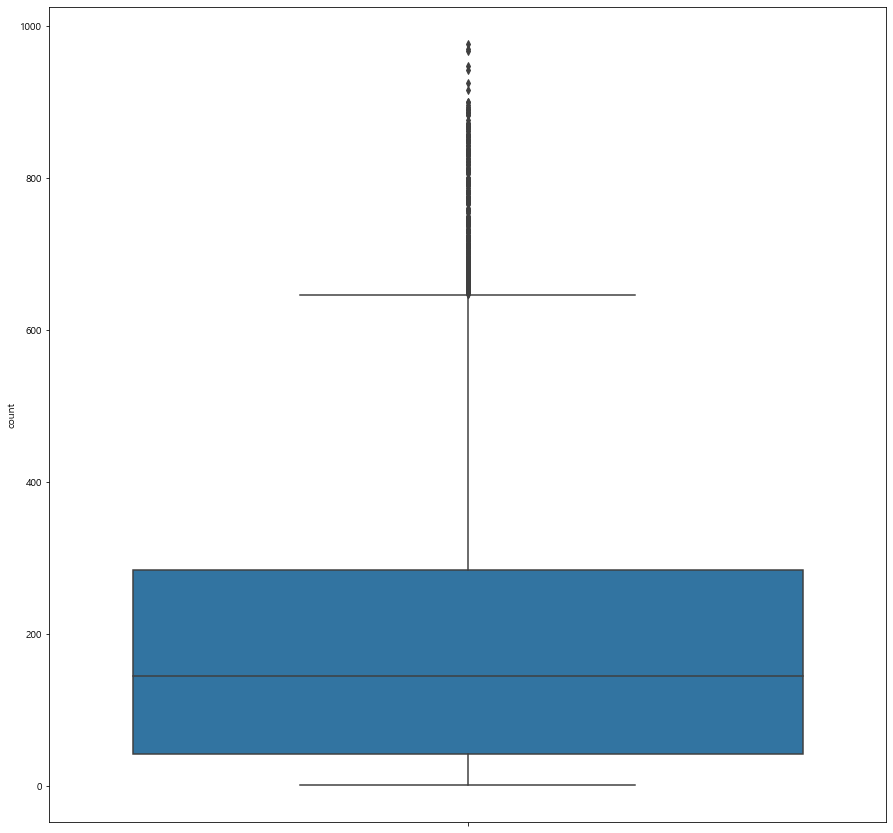

In [29]:
# 이상치 확인
sns.boxplot(y='count', data=train_corr_re)
ax1.set_title('대여량')

In [30]:
# IQR = Q3-Q1
# Q1에서 1.5 * IQR을 뺀 값을 최소 제한선, Q3에서 1.5*IQR을 더한 값이 최대 제한선

count_q1 = np.percentile(train_corr_re['count'], 25)
count_q3 = np.percentile(train_corr_re['count'], 75)
IQR = count_q3 - count_q1
print('최소제한선', count_q1)
print('최대제한선', count_q3)
print('IQR', IQR)

최소제한선 42.0
최대제한선 284.0
IQR 242.0


In [31]:
# 이상치를 제외한 데이터만 조회
train_clean = train_corr_re[(train_corr_re['count'] >= (count_q1 - (1.5 * IQR)))
                        & (train_corr_re['count'] <= (count_q3 + (1.5 * IQR)))]

Text(0.5, 1.0, '대여량')

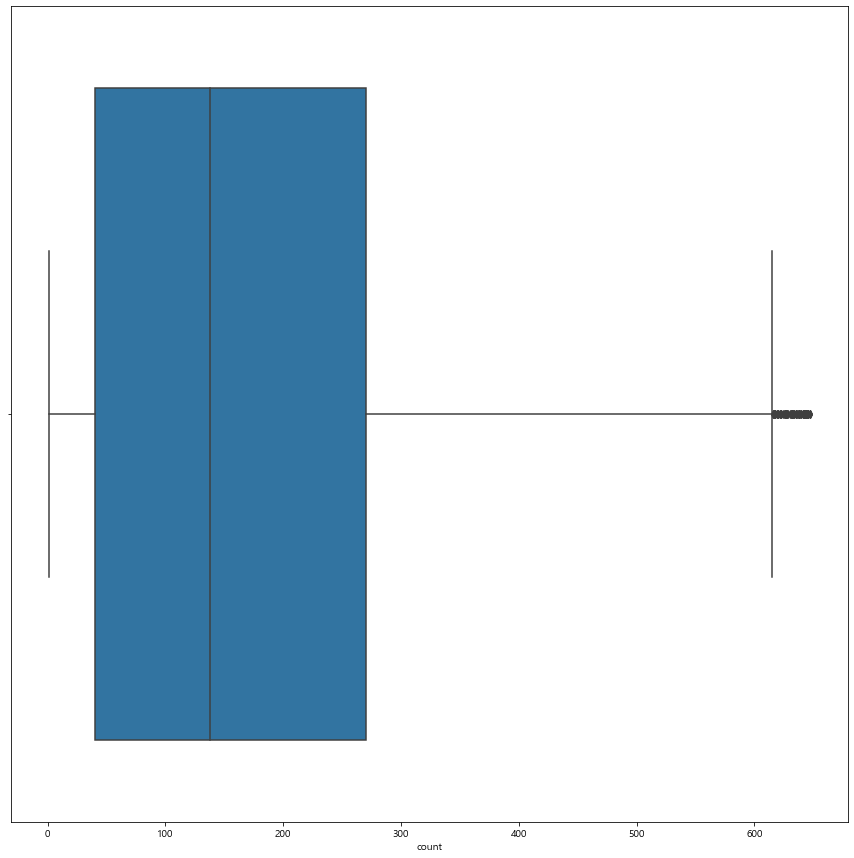

In [32]:
# 이상치 재확인
sns.boxplot(x='count', data=train_clean)
ax1.set_title('대여량')

# 이상치가 많이 줄어듦

### 데이터 정규화

In [33]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  float64
 1   count       10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   windspeed   10586 non-null  float64
 7   month       10586 non-null  int64  
 8   hour        10586 non-null  int64  
 9   dayofweek   10586 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 909.7 KB


In [34]:
# 변경된 데이터 확인
train_clean.describe()

,datetime,count,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek
count,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000
mean,253.978300,175.717079,0.029189,0.676459,1.422539,20.061494,12.776699,6.494804,11.456641,3.028245
std,186.687394,156.360023,0.168345,0.467849,0.636549,7.781496,8.173430,3.464977,6.960409,2.010143
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,1.000000,0.000000,0.000000
25%,75.014000,40.000000,0.000000,0.000000,1.000000,13.940000,7.001500,3.000000,5.000000,1.000000
50%,146.014500,138.000000,0.000000,1.000000,1.000000,20.500000,12.998000,6.000000,11.000000,3.000000
75%,439.006000,270.000000,0.000000,1.000000,2.000000,26.240000,16.997900,10.000000,18.000000,5.000000
max,516.023000,647.000000,1.000000,1.000000,4.000000,41.000000,56.996900,12.000000,23.000000,6.000000


<AxesSubplot:>

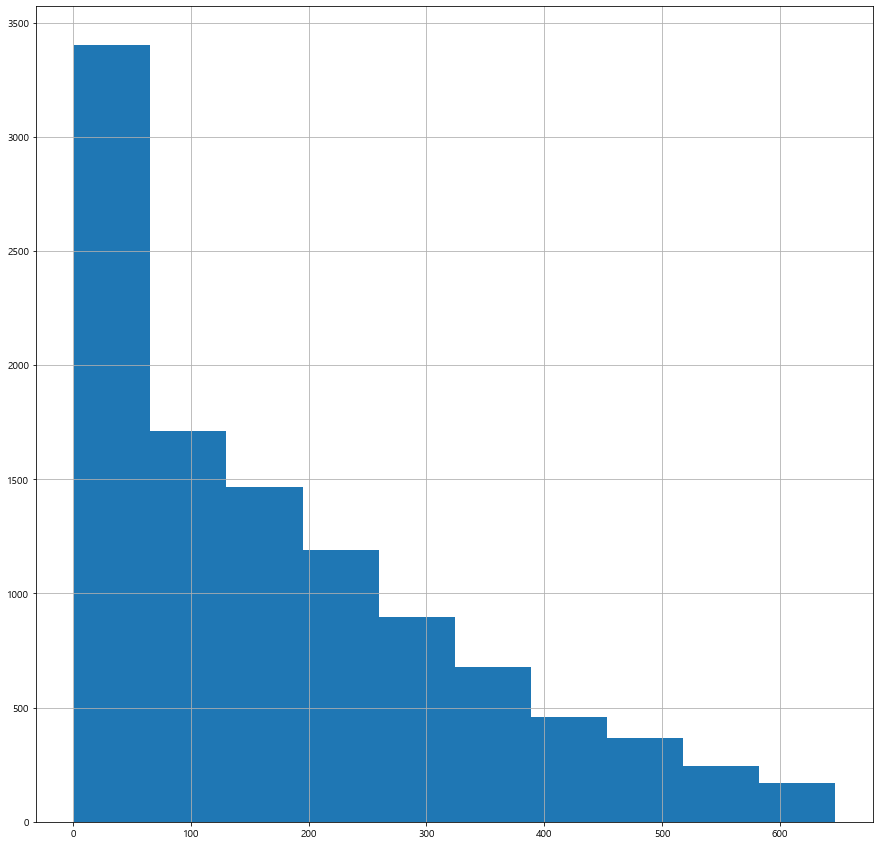

In [35]:
# 자전거 대여수 분포 확인
train_clean['count'].hist()

<AxesSubplot:>

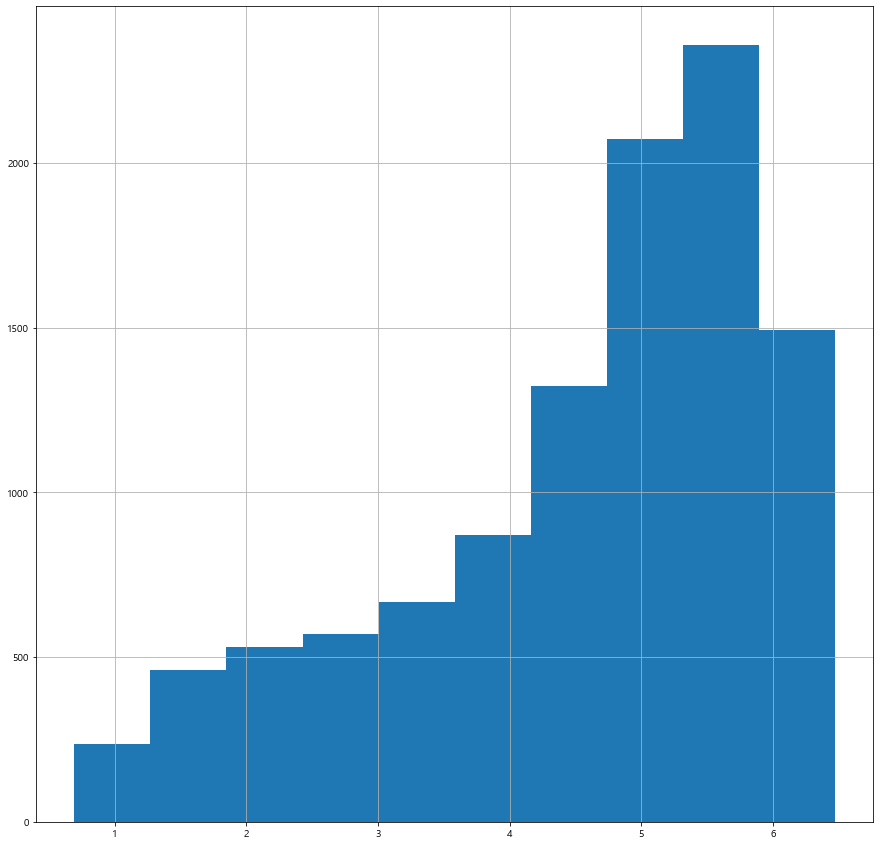

In [36]:
# 타겟 컬럼인 count 값을 log1p로 log 변환
count_log = np.log1p(train_clean['count'])
count_log.hist()

### 모델링

In [37]:
train_clean.head()

,datetime,count,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek
0,1.000,16,0,0,1,9.84,0.0,1,0,5
1,1.001,40,0,0,1,9.02,0.0,1,1,5
2,1.002,32,0,0,1,9.02,0.0,1,2,5
3,1.003,13,0,0,1,9.84,0.0,1,3,5
4,1.004,1,0,0,1,9.84,0.0,1,4,5


In [38]:
test_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [39]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  float64
 1   count       10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   windspeed   10586 non-null  float64
 7   month       10586 non-null  int64  
 8   hour        10586 non-null  int64  
 9   dayofweek   10586 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 909.7 KB


In [40]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [41]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  float64
 1   count       10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   windspeed   10586 non-null  float64
 7   month       10586 non-null  int64  
 8   hour        10586 non-null  int64  
 9   dayofweek   10586 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 909.7 KB


### 데이터셋 나누기

In [42]:
# target과 features 구분
target = 'count'
features = train_clean.columns.drop(target)

X = train_clean[features].copy()
y = train_clean[target].copy()

X_test = test_raw.copy()

# 데이터를 편리하게 분할해주는 라이브러리 활용
from sklearn.model_selection import train_test_split

# 훈련 데이터의 20%를 검증 데이터로 활용
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [43]:
# 원 핫 인코딩을 통해 범주형 데이터로 변환
X_ohe = pd.get_dummies(X, columns = ['month', 'hour', 'dayofweek', 'holiday','workingday', 'weather'])
y_ohe = pd.get_dummies(y, columns = ['month', 'hour', 'dayofweek', 'holiday','workingday', 'weather'])

In [44]:
# 변환한 X값으로 다시 데이터 분리 
X_train, X_val, y_train, y_val = train_test_split(X_ohe, y,
                                                  test_size = 0.2, random_state=0)

In [45]:
# 타겟 컬럼인 count 값을 log1p로 log 변환 (앞쪽 히스토그램 참고)
y_log = np.log1p(y)

In [46]:
# 변환한 y값으로 다시 데이터 분리 
X_train, X_val, y_train, y_val = train_test_split(X_ohe, y_log, test_size = 0.2, random_state=0)

In [47]:
# 스케일링 Normalizer
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)

In [48]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선언
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(X_train_std, y_train)

LinearRegression()

### 예측

In [49]:
a_pred = linear_model.predict(X_train_std)
a_pred

# 테스트 데이터 셋의 Target 값은 Log 변환, expm1를 이용하여 원래 scale로 변환
y_train_exp = np.expm1(y_train)
a_pred_exp = np.expm1(a_pred)
a_pred_exp

array([220.8826532 , 420.13639439, 166.31212087, ..., 134.36123136,
        14.4321572 , 449.18931044])

In [50]:
b_pred = linear_model.predict(X_val_std)
b_pred

# 테스트 데이터 셋의 Target 값은 Log 변환, expm1를 이용하여 원래 scale로 변환
y_val_exp = np.expm1(y_val)
b_pred_exp = np.expm1(b_pred)
b_pred_exp

array([ 30.47205304,  84.62173635, 228.7640184 , ...,   3.5566585 ,
       329.63445482,   7.50049781])

### 모형 평가

In [51]:
# rmsle score를 계산하는 함수 정의
def rmsle(y, pred): # 예측값, 실제값 비교
    log_y = np.log1p(y) # 실제값의 log
    log_pred = np.log1p(pred) # 예측값의 log
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [52]:
# rmsle는 작을수록 좋음
rmsle(y_train_exp, a_pred_exp)

0.5779981943355265

In [53]:
rmsle(y_val_exp, b_pred_exp)

0.6034738153672276

### test 데이터로 예측 - 전처리

In [54]:
# 데이터 셋 확인하기(shape)
print('테스트용 데이터의 shape:', X_test.shape)
print('제출용 데이터의 shape:', submission_raw.shape)

테스트용 데이터의 shape: (6493, 9)
제출용 데이터의 shape: (6493, 2)


In [55]:
# 테스트용 데이터 타입 확인(info)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [56]:
X_test['datetime'] = X_test.datetime.apply(pd.to_datetime)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [57]:
# 결측치 확인
X_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [58]:
# 테스트 데이터에 year, month, hour, dayofweek 추가
X_test['datetime'] = X_test.datetime.apply(pd.to_datetime)

# datetime -> 년, 월, 일, 시, 분, 초, 요일로 추가
X_test['year'] = X_test['datetime'].apply(lambda x : x.year)
X_test['month'] = X_test['datetime'].apply(lambda x : x.month)
X_test['hour'] = X_test['datetime'].apply(lambda x : x.hour)
X_test['dayofweek'] = X_test['datetime'].apply(lambda x : x.dayofweek)

In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  hour        6493 non-null   int64         
 12  dayofweek   6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 659.6 KB


In [60]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  float64
 1   count       10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   windspeed   10586 non-null  float64
 7   month       10586 non-null  int64  
 8   hour        10586 non-null  int64  
 9   dayofweek   10586 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 909.7 KB


In [61]:
# 데이터 타입 변경
datetime_int = X_test['datetime'].apply(lambda x: to_integer(x))
X_test['datetime'] = pd.Series(datetime_int)

In [62]:
# 필요하지 않은 데이터 삭제
drop_col = ['season', 'atemp', 'humidity', 'year']
X_test.drop(drop_col, axis=1, inplace=True)

In [63]:
# 원-핫 인코딩 ; 범주형 데이터로 변환
fin_test_ohe = pd.get_dummies(X_test, columns = ['month', 'hour', 'dayofweek', 'holiday','workingday', 'weather'])

In [64]:
# 스케일링
fin_test_std = std_scale.transform(fin_test_ohe)
fin_test_std

array([[-1.24521716, -1.19765541,  1.61898202, ..., -0.59444447,
        -0.29312023, -0.01086764],
       [-1.2452118 , -1.19765541, -1.56445055, ..., -0.59444447,
        -0.29312023, -0.01086764],
       [-1.24520645, -1.19765541, -1.56445055, ..., -0.59444447,
        -0.29312023, -0.01086764],
       ...,
       [ 1.4754109 , -1.19765541, -0.21758215, ..., -0.59444447,
        -0.29312023, -0.01086764],
       [ 1.47541626, -1.19765541, -0.46284016, ..., -0.59444447,
        -0.29312023, -0.01086764],
       [ 1.47542162, -1.19765541, -0.46284016, ..., -0.59444447,
        -0.29312023, -0.01086764]])

In [65]:
# 예측
fin_pred = linear_model.predict(fin_test_std)
fin_pred

array([2.87181418, 2.28978293, 1.80858176, ..., 5.16600363, 4.91771262,
       4.5197634 ])

In [66]:
fin_pred_exp = np.expm1(fin_pred)
fin_pred_exp

array([ 16.66904397,   8.87279436,   5.10178748, ..., 174.21322019,
       135.68959398,  90.81387215])

In [67]:
# - 2011년부터 데이터가 있음 (2011.1.1이 1으로 셋팅)

def integer_to_datetime(integer):
    import datetime
    integer_cal = integer * 1000
    a = integer_cal//1000
    b = integer_cal % 1000
    return (datetime.datetime(2011,1,1) + datetime.timedelta(days=a-1, hours=b))

In [68]:
X_test['count'] = fin_pred_exp

In [69]:
X_test.head()

,datetime,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek,count
0,20.000,0,1,1,10.66,26.0027,1,0,3,16.669044
1,20.001,0,1,1,10.66,0.0000,1,1,3,8.872794
2,20.002,0,1,1,10.66,0.0000,1,2,3,5.101787
3,20.003,0,1,1,10.66,11.0014,1,3,3,2.601974
4,20.004,0,1,1,10.66,11.0014,1,4,3,1.725559


In [70]:
X_test['datetime'] = X_test.datetime.apply(integer_to_datetime)

In [71]:
X_test.head()

,datetime,holiday,workingday,weather,temp,windspeed,month,hour,dayofweek,count
0,2011-01-20 00:00:00,0,1,1,10.66,26.0027,1,0,3,16.669044
1,2011-01-20 01:00:00,0,1,1,10.66,0.0000,1,1,3,8.872794
2,2011-01-20 02:00:00,0,1,1,10.66,0.0000,1,2,3,5.101787
3,2011-01-20 03:00:00,0,1,1,10.66,11.0014,1,3,3,2.601974
4,2011-01-20 04:00:00,0,1,1,10.66,11.0014,1,4,3,1.725559


In [72]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  float64
 1   count       10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   windspeed   10586 non-null  float64
 7   month       10586 non-null  int64  
 8   hour        10586 non-null  int64  
 9   dayofweek   10586 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 909.7 KB


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   holiday     6493 non-null   int64         
 2   workingday  6493 non-null   int64         
 3   weather     6493 non-null   int64         
 4   temp        6493 non-null   float64       
 5   windspeed   6493 non-null   float64       
 6   month       6493 non-null   int64         
 7   hour        6493 non-null   int64         
 8   dayofweek   6493 non-null   int64         
 9   count       6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 507.4 KB


In [74]:
submission = pd.DataFrame()
submission['datetime'] = test_raw['datetime']
submission['count'] = X_test['count']

In [75]:
submission

,datetime,count
0,2011-01-20 00:00:00,16.669044
1,2011-01-20 01:00:00,8.872794
2,2011-01-20 02:00:00,5.101787
3,2011-01-20 03:00:00,2.601974
4,2011-01-20 04:00:00,1.725559
...,...,...
6488,2012-12-31 19:00:00,274.552364
6489,2012-12-31 20:00:00,208.526851
6490,2012-12-31 21:00:00,174.213220
6491,2012-12-31 22:00:00,135.689594


In [76]:
# kaggle 제출용 데이터 저장
submission.to_csv('./submission.csv', index=False)